# Making Astrometry Better

To begin, I need to introduce Astrometry and the work that my mentor, John Parejko, been spending much of his time on - "jointcal". Astrometry is the measurement of positions and motions (and its errors) of celestial objects, and jointcal is a built program which takes astrometry data from telescopes (currently from Hyper Suprime Cam - Subaru) and "cleans it up" using a fit of the Full Focal plane, rather than fitting each CCD separately (the method currently being used - "single frame"). The goal is to use the error data collected, and remove the residuals caused by systematic errors. 

My work below was created to provide visual aid for John's work, and this is done by creating functions that read in data, plot the astrometry, calculate the divergence and curl of the astrometry, and plot the x and y components of the residuals. All the mentioned will provide support to John's code - jointcal - by showing that there is, or isn't structure within the data; thus some systematic error which would need to be removed via jointcal. 

I will start by going through a short explanation of Divergence and curl in general. This is was done for a few reasons, however, mainly to be sure there is an understanding of curl and divergence analytically so that we may trust the code I will create. 

# Defining "del" operator ($\nabla$)



The "del" operator is defined to be: 
$\large \nabla = \bf{i}\frac{\partial}{\partial x} + \bf{j}\frac{\partial}{\partial y} + \bf{k}\frac{\partial}{\partial z}$

This is the same in 2D, only we ommit the $\bf{k}$ term

# Defining the Divergence ("div") of a vector field ($\bf{F}$) 

$div\bf{F}$, or $\large \nabla \cdot \bf{F}$, is the dot product of del with $\bf{F}$. 

Now, if $\bf{F}=\langle P,Q,R \rangle$ then 
$${div} \bf{F}=\nabla \cdot \bf{F} = \big\langle \frac{\partial}{\partial x},\frac{\partial}{\partial y},\frac{\partial}{\partial z} \big\rangle \cdot \langle P,Q,R \rangle$$
$$= \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y} + \frac{\partial R}{\partial z}$$

This means $div\bf{F}$ is a scalar


# Defining the Curl of a Vector field ($\bf{F}$)

$curl\bf{F}$, or $\nabla \times \bf{F}$, is the cross product of del with $\bf{F}$.

Using the same vector field as above, 
$$curl\bf{F} = \nabla \times \bf{F} = \big\langle \frac{\partial}{\partial x},\frac{\partial}{\partial y},\frac{\partial}{\partial z} \big\rangle \times \langle P,Q,R \rangle = \begin{vmatrix} \bf{i} & \bf{j} & \bf{k} \\ \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\ P & Q & R \end{vmatrix} $$


$$= \bigg( \frac{\partial R}{\partial y} - \frac{\partial Q}{\partial z} \bigg)\bf{i} + \bigg( \frac{\partial P}{\partial z} - \frac{\partial R}{\partial x} \bigg)\bf{j} + \bigg( \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \bigg)\bf{k}$$

For the 2D cross product (i.e. $\bf{F}=\langle P,Q \rangle$) we get,
$$curl\bf{F}=\begin{vmatrix} \bf{i} & \bf{j} & \bf{k} \\  \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & 0 \\ P & Q & 0 \end{vmatrix} = \bigg( \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \bigg)\bf{k}$$

This means $curl\bf{F}$ a vector.

--------------------------------------------------

# Plotting Divergence and Curl Functions

- Hand write the expressions for f_div/curl 
- Compute the (u,v) values for few points for f_div/curl
- Compute Curl and Div at same points for f_div/curl

-- Check code to hand computations
 
pick function wiht non-const, non-0 div (write out by hand) -> check value at (1,2) and (2,1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn
seaborn.set_style('white')  # noqa: E402
seaborn.set_context("poster")  # noqa: E402


### For the Divergent function:
If $\bf{F}=(2x)\hat{i}+(2y)\hat{j}$, 

then $\nabla \cdot \bf{F} = 4$, and $\nabla \times \bf{F} =0$
### For the Curl function:
If $\bf{F}=(-y)\hat{i}+(x)\hat{j}$, 

then $\nabla \times \bf{F} = -2\hat{k}$, and $\nabla \cdot \bf{F} =0$

In [2]:
def f_div(x,y):
    '''
    Function with non-zero divergence everywhere and zero curl
    '''
    #simple uniform div field
    #u = 2*x 
    #v = 2*y
    #more complex non-uniform div field
    u= x**4
    v= y**4
    return u,v

def f_curl(x,y):
    '''
    Function with non-zero Curl everywhere and zero divergence
    '''
    #simple uniform curl field
    #u = -y  
    #v = x
    #more complex non-uniform curl field
    u= y**4
    v= x**4
    return u,v

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def colorbar(mappable):
    """Create a colorbar that obeys tight_layout, etc.

    Stolen from: http://joseph-long.com/writing/colorbars/

    Parameters
    ----------
    mappable
        Return value from e.g. `matplotlib.imshow()` or `matplotlib.scatter()`.
    """
    try:
        # QuadContourSet is not a Artist, so doesn't have `axes`
        ax = mappable.axes
    except AttributeError:
        ax = mappable.ax
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
     
    return fig.colorbar(mappable, cax=cax)

basic_cols=['#ff0000', '#303030', '#0099ff']
blue_to_red=LinearSegmentedColormap.from_list('mycmap', basic_cols)

def div_field(x, y):
    u,v = f_div(x,y)
    plt.title("Divergent Vector Field")
    plt.quiver(x, y, u, v, cmap=blue_to_red, pivot='mid')
    plt.show();
    return u,v
    
def curl_field(x, y):
    u,v = f_curl(x,y)
    plt.title("Curl Vector Field")
    plt.quiver(x, y, u, v, cmap=blue_to_red, pivot='mid')
    plt.show();
    return u,v
    
def calc_div(X, Y, u, v, x, y):
    uDel = np.gradient(u,y,x)
    vDel = np.gradient(v,y,x)
    divergence = uDel[1]+vDel[0] #dudx+dvdy
    return divergence

def calc_curl(X, Y, u, v, x, y):
    uDel = np.gradient(u,y,x)
    vDel = np.gradient(v,y,x)
    curl = uDel[0]-vDel[1] #dudy-dvdx
    return curl

def plot_div(ax, X, Y, u, v, x, y, vmin=None, vmax=None, xlim = None, ylim=None):
    divergence = calc_div(X,Y,u,v,x,y)
    plt.title('Divergence')
    if xlim is None and ylim is None:
        extent = [x.min(),x.max(),y.min(),y.max()]
    else:
        extent = [*xlim,*ylim]
    div_plot = ax.imshow(divergence.T, extent=extent, vmin=vmin, vmax=vmax, cmap=blue_to_red, origin='lower');
    
    return div_plot, extent

  
def plot_curl(ax, X, Y, u, v, x, y, vmin=None, vmax=None, xlim=None, ylim=None):
    curl = calc_curl(X,Y,u,v,x,y)
    plt.title('Curl')
    if xlim is None and ylim is None:
        extent = [x.min(),x.max(),y.min(),y.max()]
    else:
        extent = [*xlim,*ylim]
    curl_plot = ax.imshow(curl.T, extent=extent, vmin=vmin, vmax=vmax, cmap=blue_to_red, origin='lower');

    return curl_plot, extent

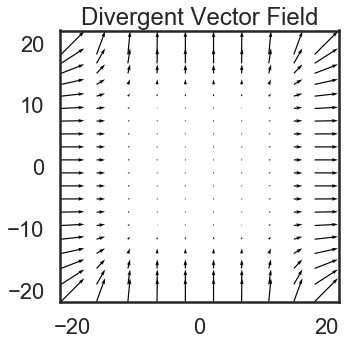

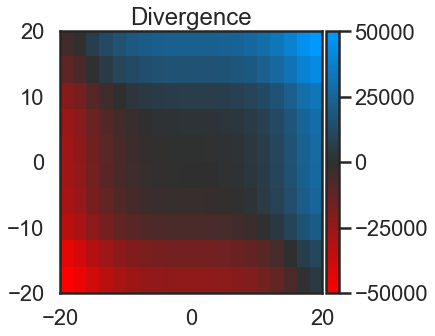

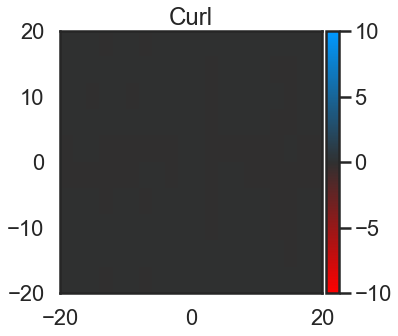

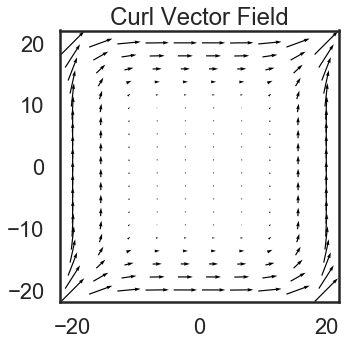

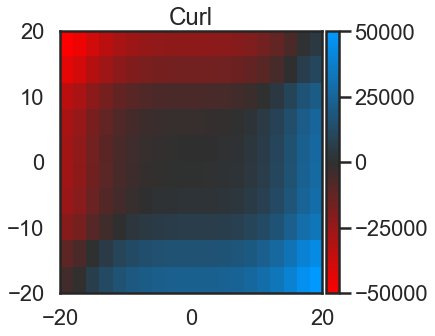

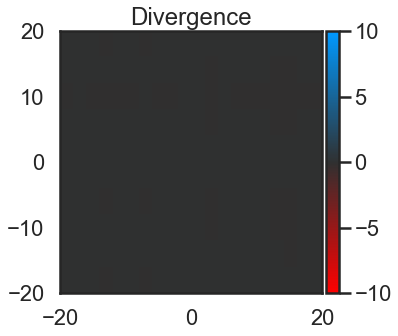

In [4]:
n = 20
x, dx = np.linspace(-n, n, n//2, retstep=True)
y, dy = np.linspace(-n, n, n, retstep=True)
X,Y = np.meshgrid(x,y)

plt.figure(figsize=(5,5))
u_div,v_div = div_field(X,Y)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
div_plot, extent = plot_div(ax, X,Y,u_div,v_div,x,y)
colorbar(div_plot);

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
div_plot, extent = plot_curl(ax,X,Y,u_div,v_div,x,y,vmin=-10,vmax=10)
colorbar(div_plot);

plt.figure(figsize=(5,5))
u_curl,v_curl = curl_field(X,Y)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
curl_plot,extent = plot_curl(ax,X,Y,u_curl,v_curl,x,y)
colorbar(curl_plot);

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
curl_plot,extent = plot_div(ax,X,Y,u_curl,v_curl,x,y,vmin=-10,vmax=10)
colorbar(curl_plot);


- checking divergence and curl 

This step was crucial to "trusting" the code. In order to make sure the 'calc_div' and 'calc_curl' functions are doing what we would like, the "simulation" functions f_div and f_curl were created, and the x and y components were explicitly chosen to comply with pure divergence and pure curl. The math was initially done by hand (I trust my math skills more than my coding); calc_div/curl was then used to obtain the divergence and curl on the uniform div/curl fields. Once I believed the functions were actually "Pure" and matched the analytical solutions done by hand, the functions were then made more complex and tested, again, by hand.

- np array ordering (row x column or column x row)

During the making of this there was a lot of confusion on how to call arrays. Most of the troubles came from understanding how numpy reads the arrays. We discovered that when attempting to get the x derivative from 'np.gradiint' we had to call the second element of the result rather than the intuitive first element, and similarly the y derivative was the counter intuitive first element.  



- step size and working with np.gradient 

This process has made me believe that 'np.garadient' is possibly the most counter intuitive, difficult function in numpy. I say this because of the above mentioned element to vertical/horizontal indexing, as well as plotting an image like we do. Unless the step size for the linear space is in steps of 1, the 'imshow()' function does not produce the expected. In order to fix this the need for saving the horizontal and vertical steps (dx,dy) proved necessary. If dx and dy were not 1, 'np.gradient'  sets a default spacing for all dimensions as a single scalar to specify the sample distance.

In [5]:
from pathlib import Path
import os
import pickle

# Reading in data and plotting Astrometry

In [6]:
def uv_mean(xlim, ylim, xx, yy, uu, vv, nx, ny):
    """Compute the mean of uu and vv on a grid within bbox."""
    uMean = np.zeros((nx-1, ny-1))
    vMean = np.zeros((nx-1, ny-1))
    xMean = np.zeros((nx-1, ny-1))
    yMean = np.zeros((nx-1, ny-1))
    ww = np.linspace(xlim[0], xlim[1], nx)
    hh = np.linspace(ylim[0], ylim[1], ny)
    xrange = np.array([((xx >= w0) & (xx <= w1)) for w0, w1 in zip(ww[:-1], ww[1:])], dtype=bool)
    yrange = np.array([((yy >= w0) & (yy <= w1)) for w0, w1 in zip(hh[:-1], hh[1:])], dtype=bool)
    dx = ww[1]-ww[0]
    dy = hh[1]-hh[0]
    for i, (w0, w1) in enumerate(zip(ww[:-1], ww[1:])):
        for j, (h0, h1) in enumerate(zip(hh[:-1], hh[1:])):
            inside = xrange[i] & yrange[j]
            xMean[i, j] = (w0 + w1)/2
            yMean[i, j] = (h0 + h1)/2
            uMean[i, j] = np.mean(uu[inside]) #np slicing 
            vMean[i, j] = np.mean(vv[inside])

    return xMean, yMean, uMean, vMean, dx, dy


def plot_quiver(ax, xx, yy, uu, vv, ccd, label):
    """Make a quiver plot of the astrometry error vectors."""
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    color = cycle[0] if 'jointcal' in label else cycle[1]
    scale = 0.015 if 'mean' in label else 1
    
    cmap = ListedColormap(seaborn.color_palette('husl',256).as_hex())
    
    angle = np.nan_to_num(np.arctan2(vv,uu))
    Q = ax.quiver(xx, yy, uu, vv, np.degrees(angle), cmap=cmap, units='x', pivot='tail', scale=scale, width=50,
                  headwidth=4, clip_on=False)
    
    fig.subplots_adjust()

    filename = Path("plots/quiver-%s-%s.png"%(ccd, label))
    return Q

In [7]:
figsize = (1.05*12,12)
def plot_astrometry(data, name):
    fig = plt.figure(figsize=figsize) 
    ax = fig.add_subplot(111)
    ax.set_title("%s Full Focal Plane Astrometry"%name)
    for ccd in data:
        Q = plot_quiver(ax, data[ccd].x, data[ccd].y, data[ccd].u, data[ccd].v, ccd, 'mean-'+name)
    length = 20
    ax.quiverkey(Q, 0.31, 0.15, length, '%s mas'%(length), angle=0, coordinates='figure',
                 labelpos='W', fontproperties={'size': 24}) 
    colorbar(Q);

In [8]:
import glob

def read_data(name):
    pattern = os.path.abspath('focalplane/%s/pickles/quiverData-%s-*.pickle'%(name, name))
    files = glob.glob(pattern)

    from collections import namedtuple
    UVData = namedtuple("uvmean", ["x", "y", "u", "v", "xlim", "ylim", "dx", "dy",]) 

    data = {}
    for file in files:
        with open(os.path.expanduser(file), 'rb') as infile:
            xx, yy, uu, vv, xlim, ylim, ccd = pickle.load(infile)
            xTemp, yTemp, uTemp, vTemp, dxTemp, dyTemp = uv_mean(xlim, ylim, xx, yy, uu, vv, 10, 20)
            data[ccd] = UVData(xTemp.copy(), yTemp.copy(), uTemp.copy(), vTemp.copy(), xlim, ylim, dxTemp, dyTemp)
    return data

- using 'namedtuple()' vs 'np.vstack()'

The method to save the data read from the pickle files was changed to using 'namedtuple()' vs 'np.vstack', which stacked the values into an array, to make the process more speedy and clear, as well as allow for creating the intrinsic gap between each CCD on Hyper Suprime Cam's (HSC) Focal plane when plotting using 'imshow()'. Without this, there would be inaccurate values at the location of the gaps where there is no CCD. 

- looping through each CCD 

In order to accomplish what was mentioned above (individual CCDs onto one plot showing the full focal plane) the need for a 'for loop' arose, but like with most things, it created problems. First, the for loop goes through each CCD and plots it on the main figure, however in order to adjust the figure for the color bar resizing, the plotting function is saved and applied to our 'colorbar()' function; thus needing an adjustment to the overall figure size (in x) to keep it square. This function as well as 'quiverkey()' (above cell) and 'set_title()' had be outside the loop and plotting function as a whole in order to refrain from creating (visible) overlapping names/labels.

Something to note: when calling the plotting function outside the 'for loop', it only takes a single CCD, namely the last one in the order with the pickle files. This is important to note, because if, for example, the final CCD did note have angles varying between ~-180 to ~180, 'colorbar()' would not be scaled in the manner show below, rather it would only scale from the minimum to the maximum angle. For our use, this does not affect out results since all CCDs share roughly the same angle range.   

C:\Users\hsham\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\hsham\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


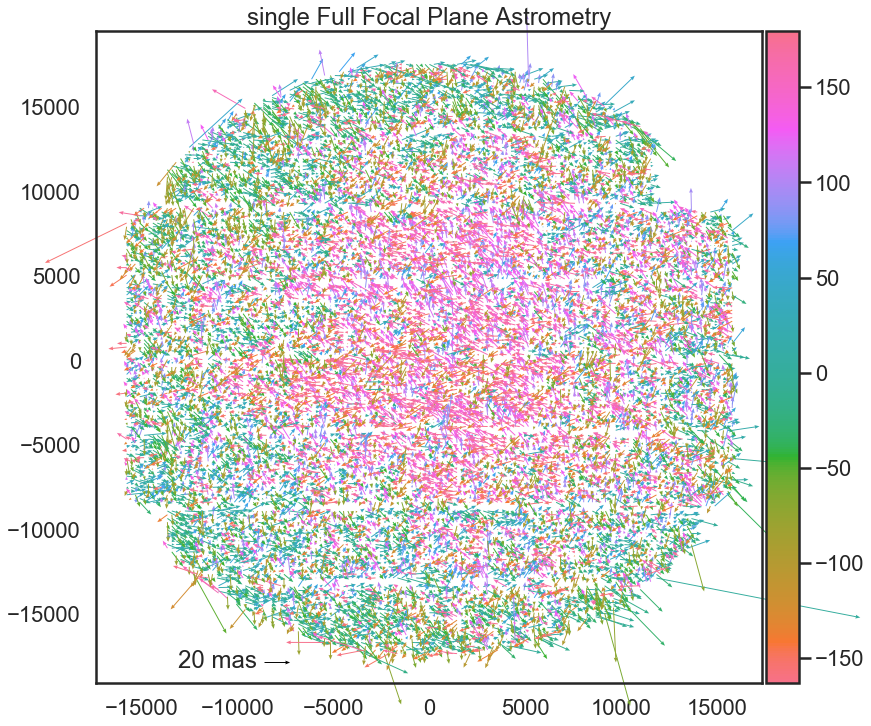

In [9]:
data_single = read_data('single')
plot_astrometry(data_single, 'single')

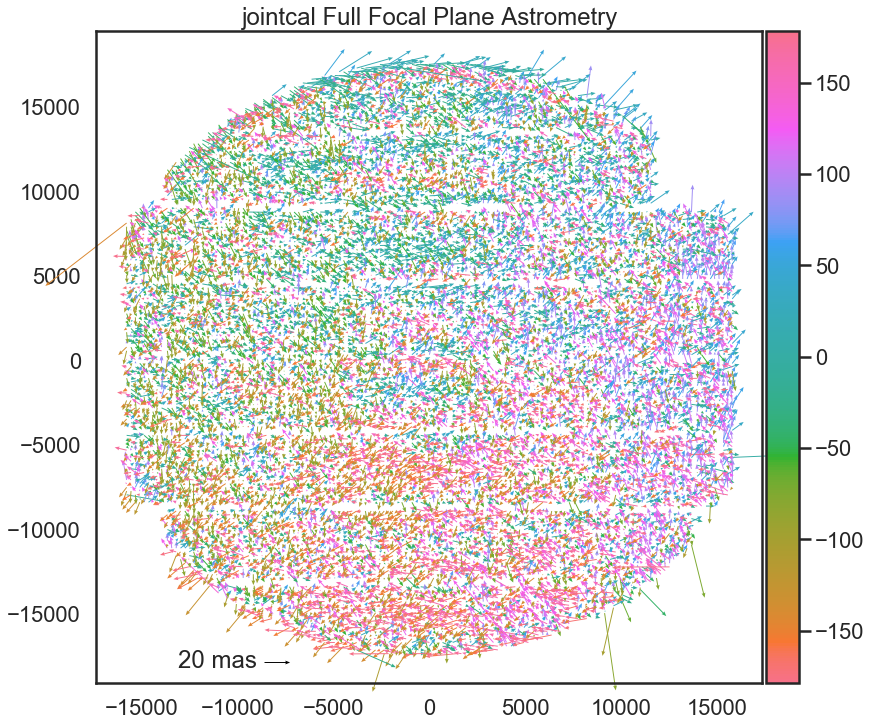

In [10]:
data_jointcal = read_data('jointcal')
plot_astrometry(data_jointcal,'jointcal')

# Plotting Divergence and Curl plots 

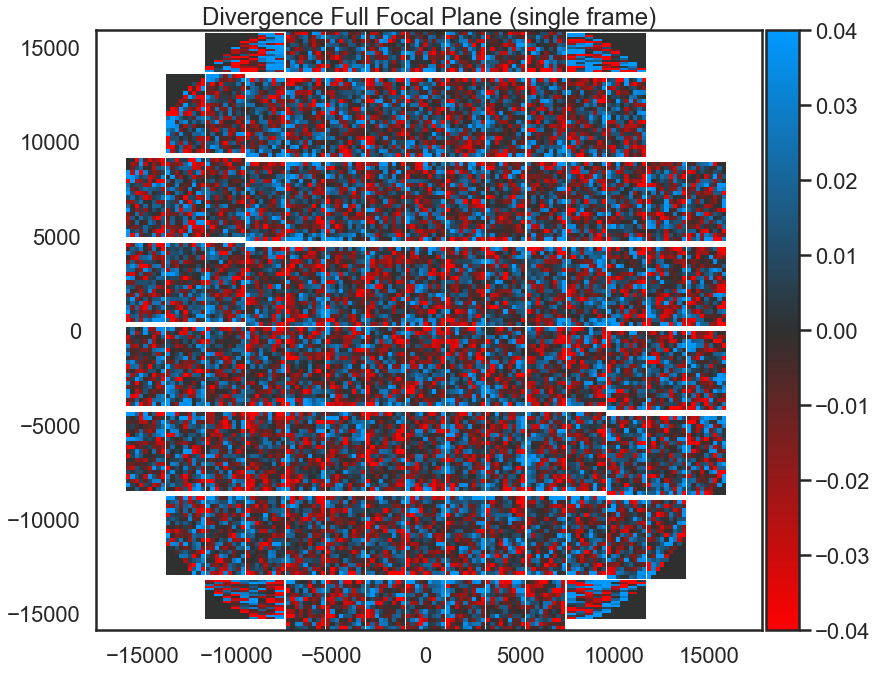

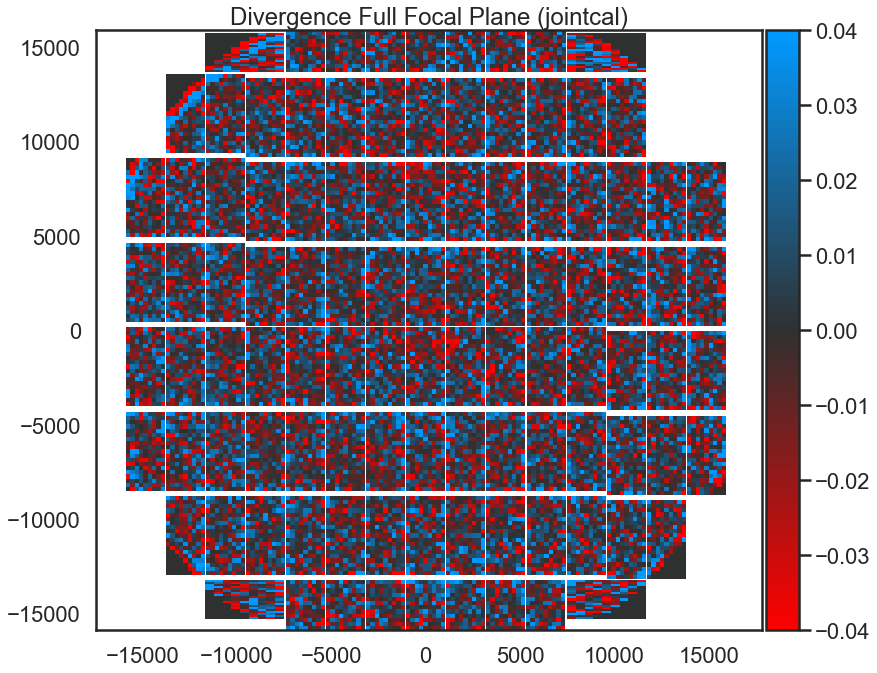

In [11]:
v_range = 0.04
def plot_the_div(data, label):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    extent = []

    for ccd in data:
        div_plot,ext = plot_div(ax, data[ccd].x, data[ccd].y, np.nan_to_num(data[ccd].u), np.nan_to_num(data[ccd].v),
                                data[ccd].dx, data[ccd].dy, xlim=data[ccd].xlim, ylim=data[ccd].ylim, vmin=-v_range,vmax=v_range)
        extent.append(ext)

    colorbar(div_plot)
    ax.set_title("Divergence Full Focal Plane (%s)"%label)
    extent = np.array(extent, dtype=float)
    ax.set_ylim(extent[:,0].min(),extent[:,1].max())
    ax.set_xlim(extent[:,2].min(),extent[:,3].max());
plot_the_div(data_single, 'single frame')
plot_the_div(data_jointcal, 'jointcal')

- Divergence comparison

The divergence of the error vectors is plotted above using the single frame data as well as the jointcal data to show how jointcal is able to, overall reduce the divergence; this is shown by noting the darker shade in the plot as a whole. 

We also note the concentric rings that are on the jointcal divergence plot. These rings are indications of systematic error which needs to be removed via John's jointcal code. The fact the rings are concentric leads us to believe that the error would be removable by a radial function.  

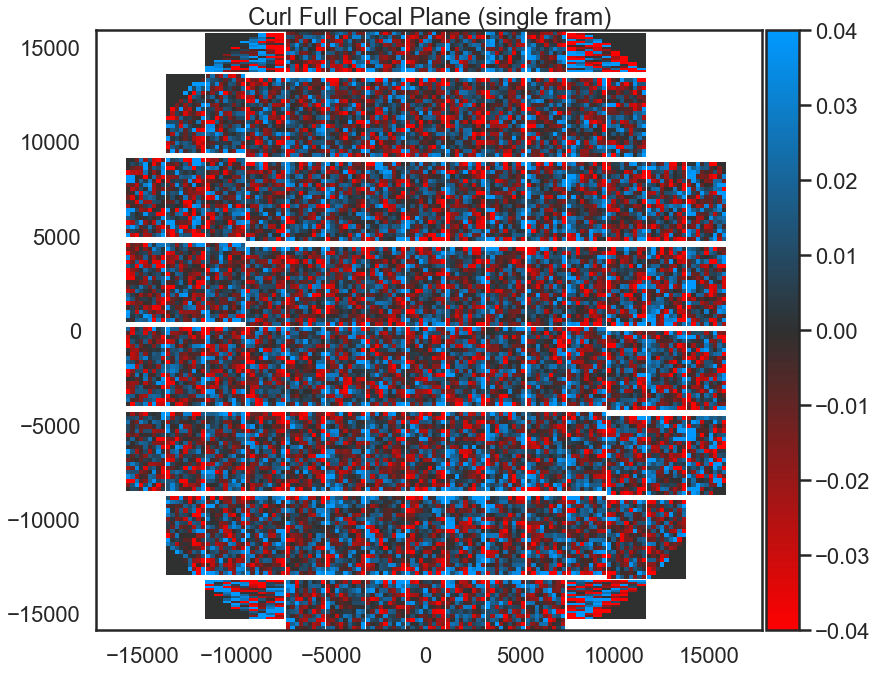

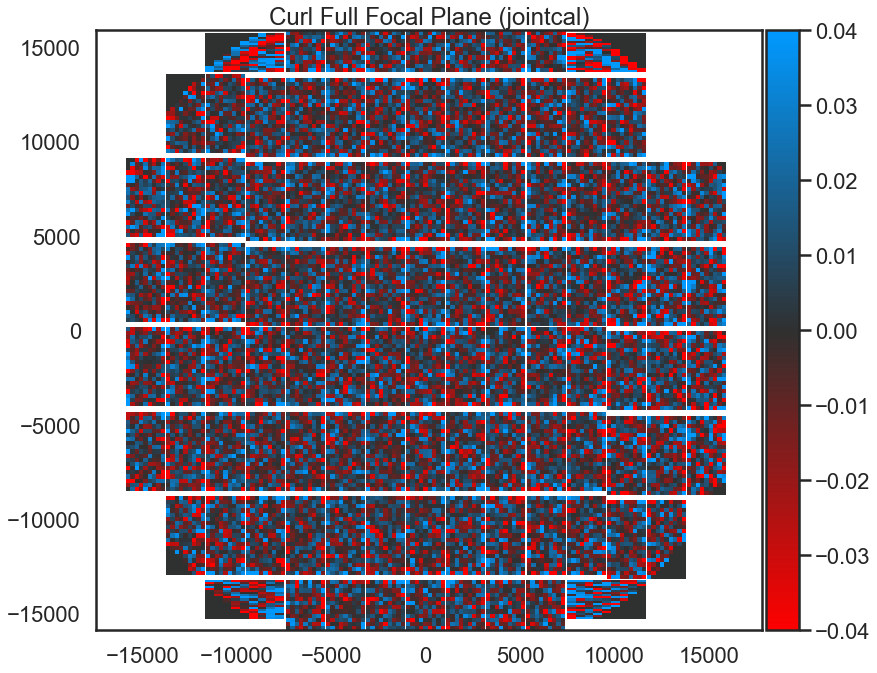

In [12]:
def plot_the_curl(data, label):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    extent = []

    for ccd in data:
        curl_plot,ext = plot_curl(ax, data[ccd].x, data[ccd].y, np.nan_to_num(data[ccd].u), np.nan_to_num(data[ccd].v),
                                data[ccd].dx, data[ccd].dy, xlim=data[ccd].xlim, ylim=data[ccd].ylim, vmin=-v_range,vmax=v_range)
        extent.append(ext)

    colorbar(curl_plot)
    ax.set_title("Curl Full Focal Plane (%s)"%label)
    extent = np.array(extent, dtype=float)
    ax.set_ylim(extent[:,0].min(),extent[:,1].max())
    ax.set_xlim(extent[:,2].min(),extent[:,3].max());
plot_the_curl(data_single, 'single fram')
plot_the_curl(data_jointcal, 'jointcal')

- Curl Comparison

Although when comparing jointcal and single frame curl plots there is little difference, the main thing to note is, like in the divergence plots, there is an overall reduced curl for the full focal plane (i.e. a darker shade throughout). 

# Component plotting (uMean and vMean vs x,y)

In [13]:
def component_plot(ax, data, component):
    extent=(data.ylim[0], data.ylim[1], data.xlim[0], data.xlim[1])
    plot = ax.imshow(component, extent=extent, vmin=-10, vmax=10, cmap=blue_to_red, origin='lower') #fix origin
    return plot, extent

def plot_comp(data, component, label):    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    extent = []
    for ccd in data:
        plot,ext = component_plot(ax, data[ccd], getattr(data[ccd],component))
        extent.append(ext)
    extent = np.array(extent, dtype=float)
    plt.title('%s (Full Focal Plane - %s)'%(component,label))
    colorbar(plot)
    ax.set_ylim(extent[:,0].min(),extent[:,1].max())
    ax.set_xlim(extent[:,2].min(),extent[:,3].max());

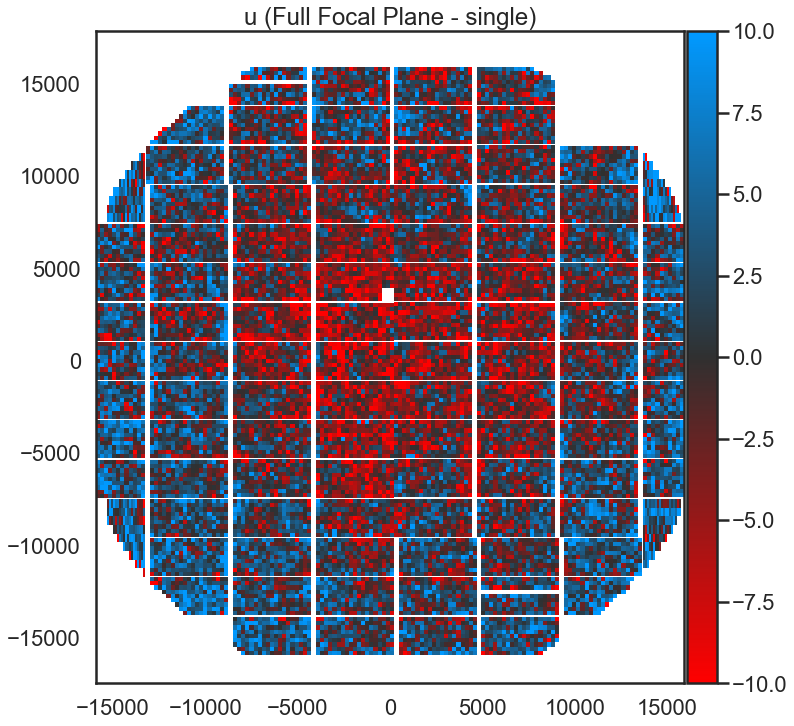

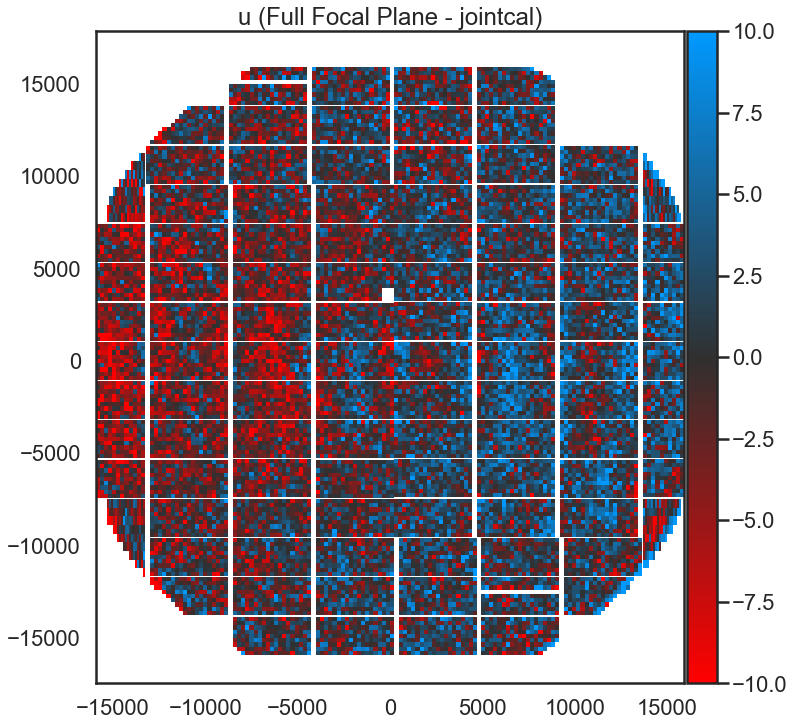

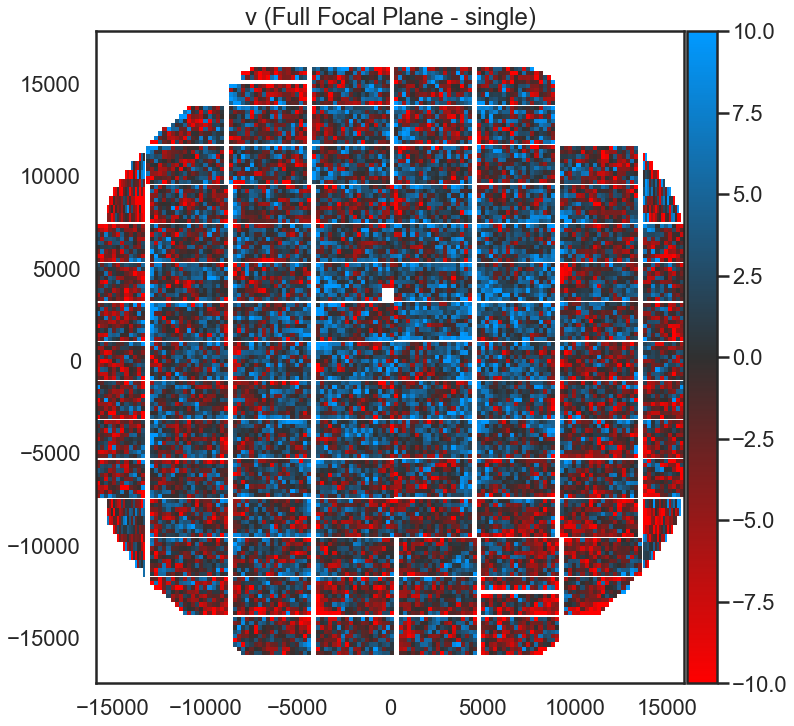

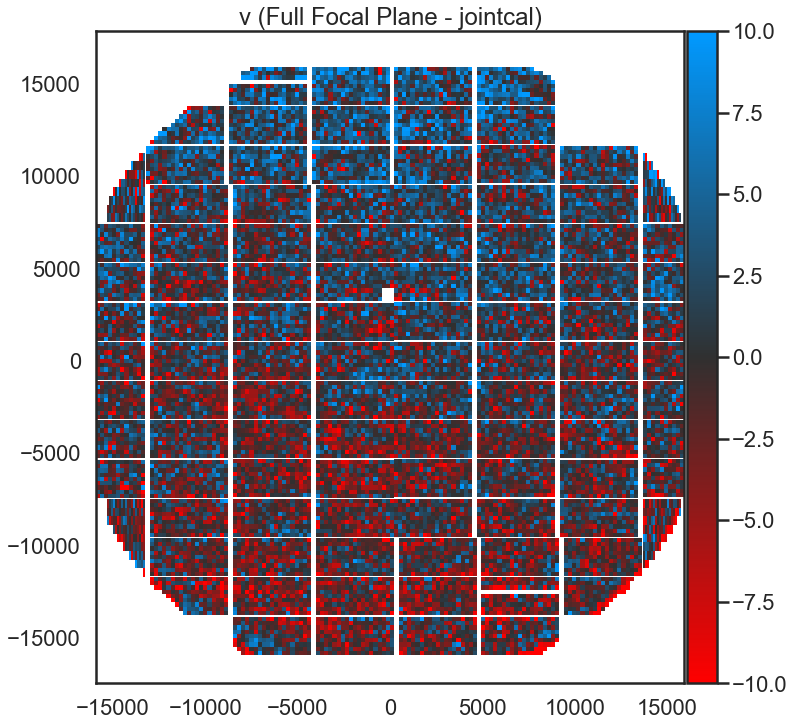

In [14]:
plot_comp(data_single,'u', 'single')
plot_comp(data_jointcal,'u', 'jointcal')
plot_comp(data_single,'v','single')
plot_comp(data_jointcal,'v','jointcal') 

- Component plots

The above component plots for jointcal show that there is an overall linear increase from left to right, and bottom to top for u and v, respectively. 

Again, we see the overall darker trend in the plots which indicate overall lower residuals. We also note the concentric ring like structure that appear on the component plots like our divergence plots. These rings will need to be looked into further in order to interoperate their meaning, but for now the indication is a radial function systematic error. 

- Functions and their beauty

Throughout this process I have learned many things, however I do find that the most significant change to my coding habits lies in creating functions. The amount of time and confusion that defining functions has saved is un parallel to all that I have learned. The more that I code the more relevant this task is. It allows me as a researcher to grow and evolve my coding so that it may be easier, or a little simpler to use for that of an outside looking into my work. 

# Has this helped our goal?

The goal of jointcal is to more accurately plot astrometry as a whole, and the goal of my work is to aid in believing jointcal is reaching its goal.

In analyzing the plots and information above we see a few trends when comparing the jointcal data and the single frame data; 1) the plots and figures have, overall, lower residuals and gradients, 2) there are more distinct structures which could be removed once jointcal has been modified to fix the (presumed) systematic errors.

### What is next?

- random gaussian noise at varying scales [0.1,1,10]; using 'np.random.normal()'

Adding noise in to the data to see the amount in which divergence and curl changes with the respective scale of noise created by the gaussian noise factor. Once noise is incorporated, we can plot the signal/noise ratio to visually see the amount that noise will affect our results. We can then also plot the mean (uMean and vMean) and the respective standard deviation to see how noise effects the original "uMean" and "vMean" plots.  